# Jednodimenzionalne gradijentne metode

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import inf

## Njutn-Rapsonova metoda

1. Početno pogađanje
$$x_0$$
2. Iterativni postupak
$$x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}$$
3. Uslov zaustavljanja
$$|x_{k+1}-x_k| \le \varepsilon$$

In [2]:
def newthn_rapson(df, ddf, x_0, tol = 1e-5, max_iter = 100):
    x_new, x_prev = x_0, inf
    for _ in range(max_iter):
        x_prev = x_new
        x_new = x_prev - df(x_prev)/ddf(x_prev)
        if abs(x_new - x_prev) < tol:
            break
    return x_new

In [3]:
def f1(x):
    return x**2-np.sin(2*x)

def df1(x):
    return 2*x - 2*np.cos(2*x)

def ddf1(x):
    return 2 + 4 * np.sin(2*x)

In [4]:
x_0 = 5
x_opt = newthn_rapson(df1, ddf1, x_0)
print(x_opt, f1(x_opt))

0.5149332646611294 -0.5920740012779437


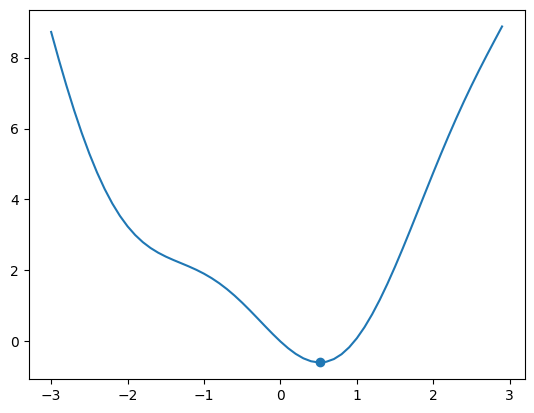

In [5]:
x = np.arange(-3, 3, 0.1)
y = f1(x)

plt.plot(x, y)
plt.scatter(x_opt, f1(x_opt))
plt.show()

## Metod sečice

1. Početno pogađanje
$$x_0, x_1$$
2. Iterativni postupak
$$x_{k+1} = x_k - f'(x_k)\frac{x_k-x_{k-1}}{f'(x_k) - f'(x_{k-1})}$$
3. Uslov zaustavljanja
$$|x_{k+1}-x_k| \le \varepsilon$$

In [6]:
def bisector(df, x_0, x_1, tol = 1e-5, max_iter = 100):
    x_new, x_prev, x_prev_prev = x_1, x_0, inf
    for _ in range(max_iter):
        x_prev_prev = x_prev
        x_prev = x_new
        x_new = x_prev - df(x_prev) * (x_prev - x_prev_prev) / (df(x_prev) - df(x_prev_prev))
        if abs(x_new - x_prev) < tol:
            break
    return x_new

In [7]:
x_0 = 5
x_1 = -5
x_opt = bisector(df1, x_0, x_1)
print(x_opt, f1(x_opt))

0.5149332647348326 -0.5920740012779437


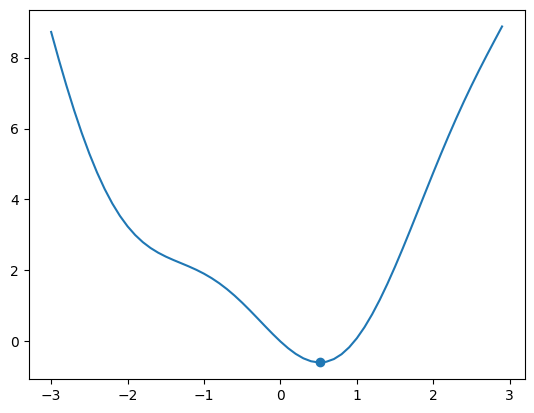

In [8]:
plt.plot(x, y)
plt.scatter(x_opt, f1(x_opt))
plt.show()